In [146]:
import pandas as pd  # Librer칤a para manejar datos
import matplotlib.pyplot as plt  # Para gr치ficos
import seaborn as sns  # Para gr치ficos bonitos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix


In [46]:
ruta = r'C:\Users\LENOVO\Documents\Arboles de Desicion\arboles.csv'
data = pd.read_csv(ruta)

# Mostrar mensaje de 칠xito
print("춰Datos cargados correctamente!")

춰Datos cargados correctamente!


1.Realizar un an치lisis exploratorio de los datos para identificar 
relaciones entre variables, valores at칤picos, tendencias, etc.

In [25]:
#Verifico si cargo muy bien el archivo 
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [27]:
#Verificar cuantos columnas tiene el archivo
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [40]:
# Cargar el archivo
datos = pd.read_csv('arboles.csv')
# Tama침o del dataset
print("Tama침o del dataset:", datos.shape)

# Informaci칩n de las columnas
print("\nInformaci칩n de las columnas:")
print(datos.info())

# Revisar si hay valores nulos
print("\nValores nulos en cada columna:")
print(datos.isnull().sum())

Tama침o del dataset: (1599, 12)

Informaci칩n de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Valores nulos en cada columna:
fixed acidity           0
vo

In [42]:
print(datos.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

En el an치lisis exploratorio del conjunto de datos de vinos, se observaron estad칤sticas descriptivas relevantes de las variables f칤sico-qu칤micas y sensoriales. Los valores muestran que la mayor칤a de las caracter칤sticas, como la acidez fija, el pH, y el contenido de alcohol, se encuentran dentro de rangos esperados para vinos, aunque existen algunos valores extremos, especialmente en az칰car residual, cloruros y di칩xido de azufre total. La calidad del vino presenta una distribuci칩n ligeramente centrada en los valores 5 y 6, lo cual sugiere una predominancia de vinos de calidad media. A continuaci칩n, se presentan algunos histogramas que ilustran la distribuci칩n de las principales variables.


2. Preprocesar los datos limpi치ndolos, tratando valores faltantes y transform치ndolos seg칰n sea necesario

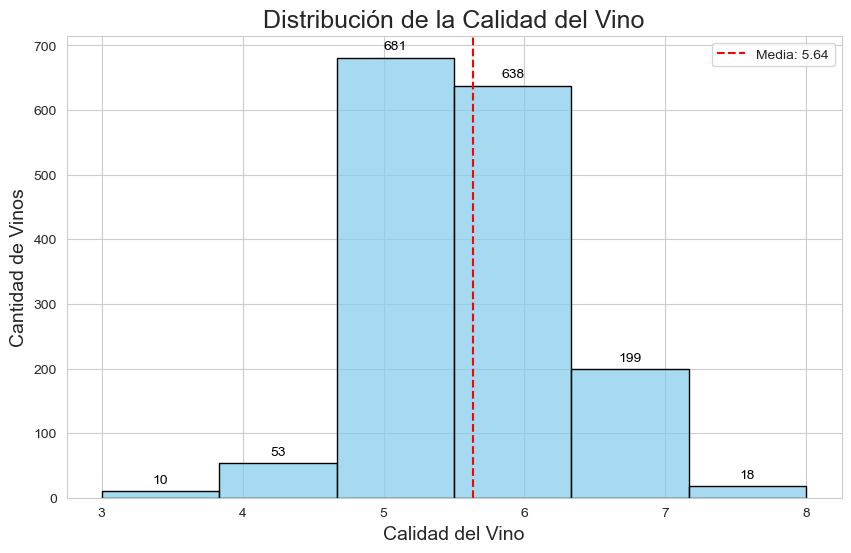

In [62]:
# Estilo m치s bonito
sns.set_style('whitegrid')

# Crear figura
plt.figure(figsize=(10, 6))
hist = sns.histplot(data=data, x='quality', bins=6, kde=False, color='skyblue', edgecolor='black')

# Agregar etiquetas a cada barra
for p in hist.patches:
    height = p.get_height()
    hist.annotate(f'{int(height)}',
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center',
                  xytext=(0, 8),
                  textcoords='offset points',
                  fontsize=10, color='black')

# T칤tulos y etiquetas
plt.title('Distribuci칩n de la Calidad del Vino', fontsize=18)
plt.xlabel('Calidad del Vino', fontsize=14)
plt.ylabel('Cantidad de Vinos', fontsize=14)

# L칤nea vertical en la media
media_calidad = data['quality'].mean()
plt.axvline(media_calidad, color='red', linestyle='--', label=f'Media: {media_calidad:.2f}')

# Mostrar leyenda
plt.legend()

# Mostrar gr치fico
plt.show()

El histograma de la variable calidad muestra c칩mo se distribuyen las muestras de vino seg칰n su puntuaci칩n. Se observa que la mayor칤a de los vinos tienen una calidad entre 5 y 6, siendo estos los valores m치s frecuentes. Adem치s, hay muy pocas muestras con calificaciones extremas, como 3 u 8. Esto indica que la calidad del vino en el conjunto de datos est치 concentrada alrededor de valores medios, con una distribuci칩n ligeramente sesgada hacia la izquierda.

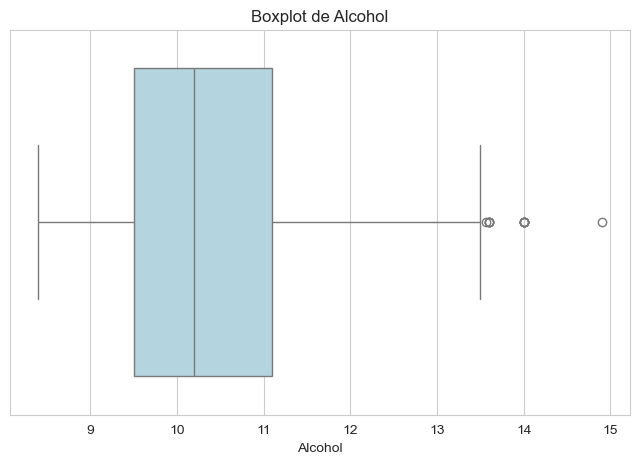

In [66]:
# Boxplot para la variable "alcohol"
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['alcohol'], color='lightblue')
plt.title('Boxplot de Alcohol')
plt.xlabel('Alcohol')
plt.show()

En el an치lisis de boxplots de las variables num칠ricas, se puede observar la distribuci칩n general de los datos, identificando la mediana, los cuartiles y los valores extremos (outliers). Las variables como alcohol y residual sugar presentan valores at칤picos destacados, lo que indica que existen registros que se alejan considerablemente de la mayor칤a de los datos. Este tipo de an치lisis permite detectar posibles errores en los datos o caracter칤sticas especiales de algunos vinos que podr칤an influir en la calidad.

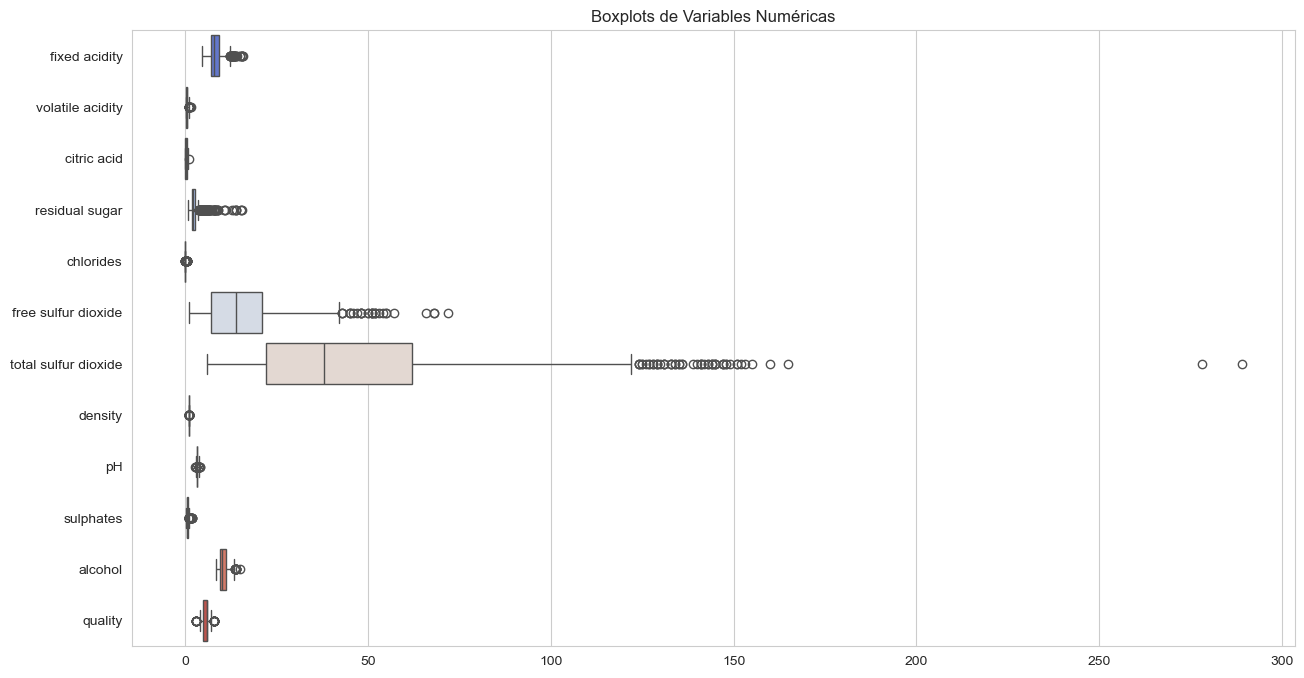

In [70]:
# Seleccionar solo las columnas num칠ricas
numericas = data.select_dtypes(include=['float64', 'int64'])

# Crear boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=numericas, orient="h", palette="coolwarm")
plt.title('Boxplots de Variables Num칠ricas')
plt.show()

Con este segundo bloque veo todos los boxplots en una sola figura.



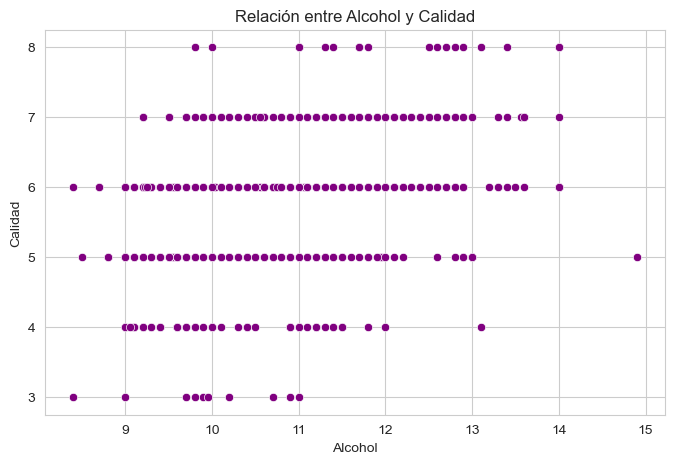

In [76]:
# Scatterplot entre Alcohol y Calidad
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['alcohol'], y=data['quality'], color='purple')
plt.title('Relaci칩n entre Alcohol y Calidad')
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.show()

A trav칠s del scatterplot realizado entre las variables alcohol y calidad, se identifica una tendencia positiva: a medida que aumenta el contenido de alcohol, la calidad del vino tiende a mejorar. Esto sugiere una posible correlaci칩n entre estas dos variables, lo cual puede ser 칰til para futuros an치lisis predictivos. El uso de diagramas de dispersi칩n facilita la visualizaci칩n de patrones y relaciones entre diferentes atributos del conjunto de datos.



In [83]:
# Verificar valores faltantes
missing_values = data.isnull().sum()
print(missing_values)

# Si quieres ver s칩lo columnas que tengan faltantes
print(missing_values[missing_values > 0])

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Series([], dtype: int64)


Se revisaron los valores faltantes en el dataset. No se encontraron datos nulos, por lo que no fue necesario realizar limpieza adicional en esta etapa.

3.Seleccionar las caracter칤sticas m치s relevantes para entrenar el modelo utilizando selecci칩n de caracter칤sticas

In [86]:
# Ver correlaciones con la variable objetivo
correlation = data.corr()

# Correlaci칩n de todas las variables respecto a 'quality'
correlation_target = correlation['quality'].sort_values(ascending=False)

print(correlation_target)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


Se realiz칩 un an치lisis de correlaci칩n entre las variables del conjunto de datos y la variable objetivo 'quality'.
Los resultados muestran que las variables que presentan mayor correlaci칩n positiva con la calidad son alcohol (0.476), sulphates (0.251) y citric acid (0.226).
Por otro lado, las variables volatile acidity (-0.390), total sulfur dioxide (-0.185) y density (-0.174) tienen una correlaci칩n negativa, indicando que su aumento podr칤a estar asociado a una disminuci칩n en la calidad.
Con base en estos resultados, se seleccionar치n las variables con mayor influencia para el posterior entrenamiento del modelo.

 4. Dividir el dataset en Train y Test

5. Entrenar el modelo configurando los diferentes hiperpar치metros.

In [88]:
from sklearn.model_selection import train_test_split

# Separar variables independientes (X) y variable dependiente (y)
X = data[['alcohol', 'sulphates', 'citric acid']]  # las variables seleccionadas
y = data['quality']

# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
print (X_train)


      alcohol  sulphates  citric acid
493      11.6       0.74         0.31
354      11.9       0.59         0.40
342       9.8       0.75         0.47
834       9.4       0.47         0.26
705       9.9       0.49         0.15
...       ...        ...          ...
1130     10.4       0.63         0.00
1294     10.9       0.75         0.10
860       9.5       0.54         0.06
1459     11.9       0.80         0.35
1126     13.5       0.54         0.26

[1279 rows x 3 columns]


Se visualiz칩 el conjunto de entrenamiento, confirmando que contiene las tres caracter칤sticas seleccionadas (alcohol, sulphates, citric acid) y un total de 1279 muestras. Cada fila representa un vino distinto, y cada columna representa el valor de una caracter칤stica relevante para la predicci칩n de la calidad.

In [103]:
# Crear el modelo Random Forest
# Configuramos los hiperpar치metros: 
# n_estimators = n칰mero de 치rboles en el bosque
# max_depth = profundidad m치xima de los 치rboles
modelo = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train)

print("Modelo entrenado correctamente :)")

Modelo entrenado correctamente :)


Se entren칩 un modelo de Random Forest configurando los hiperpar치metros n_estimators=100 (n칰mero de 치rboles) y max_depth=5 (profundidad m치xima de cada 치rbol). Se utiliz칩 una semilla aleatoria (random_state=42) para asegurar la reproducibilidad de los resultados

In [105]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo 츼rbol de Decisi칩n
# Configuramos hiperpar치metros: profundidad m치xima
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train)

print("Modelo de 츼rbol de Decisi칩n entrenado correctamente 游꺕")

Modelo de 츼rbol de Decisi칩n entrenado correctamente 游꺕


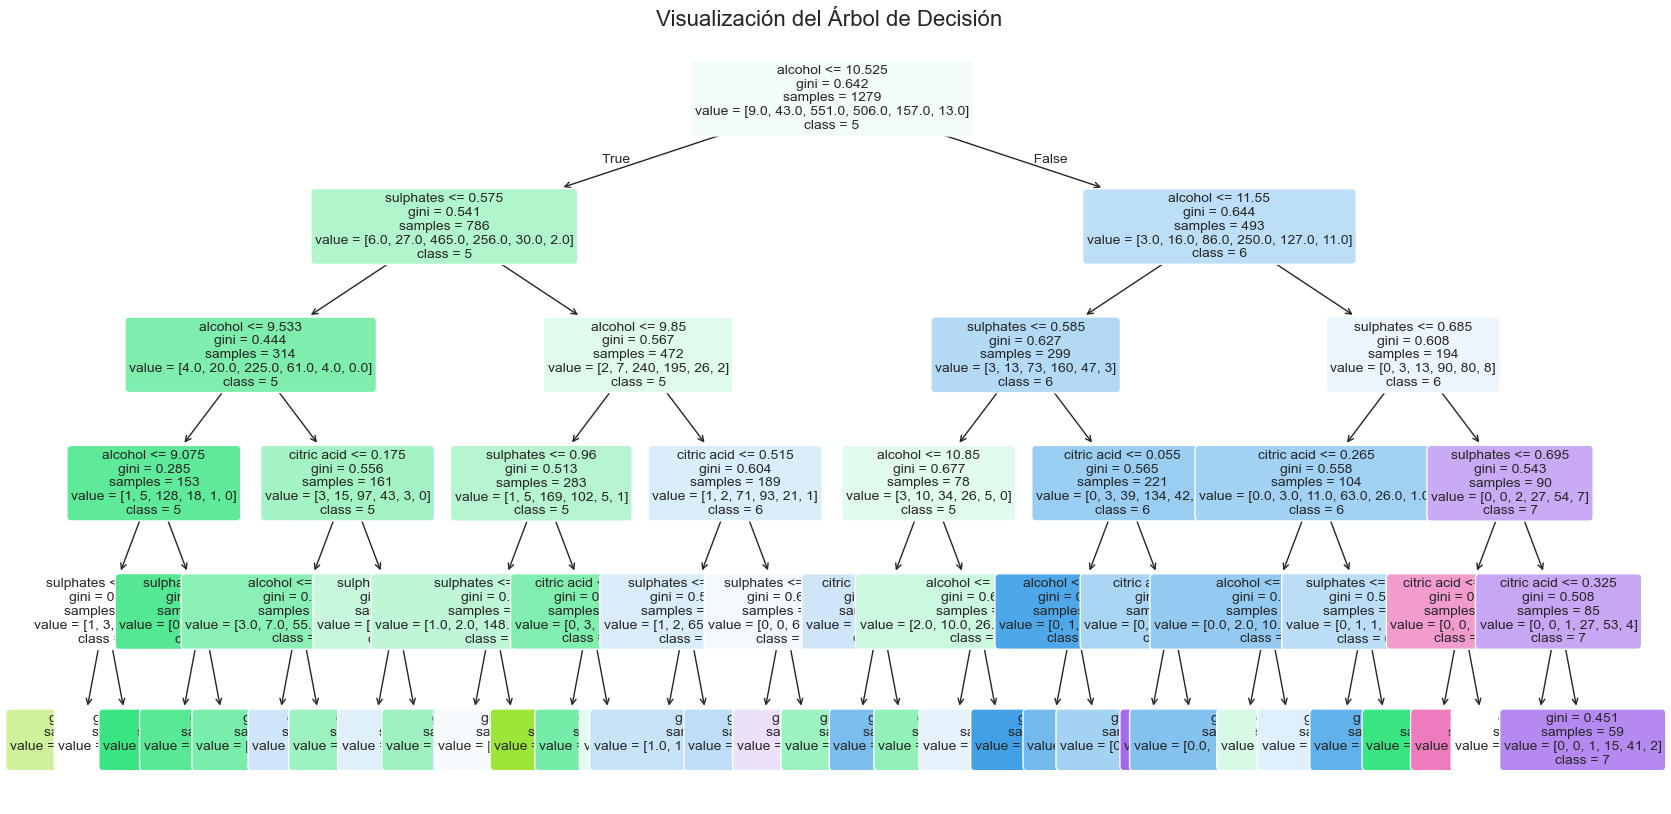

In [109]:
# Visualizar el 츼rbol de Decisi칩n
plt.figure(figsize=(20,10))
plot_tree(
    modelo, 
    feature_names=X_train.columns,  # nombres de las columnas
    class_names=[str(cls) for cls in modelo.classes_],  # clases como texto
    filled=True,    # colorea las hojas seg칰n la clase
    rounded=True,   # esquinas redondeadas
    fontsize=10     # tama침o de fuente
)
plt.title('Visualizaci칩n del 츼rbol de Decisi칩n ', fontsize=16)
plt.show()

En esta fase, configuramos el modelo de 츼rbol de Decisi칩n utilizando algunos hiperpar치metros clave para mejorar su rendimiento. Para entrenar el modelo, elegimos un valor para la profundidad m치xima del 치rbol, que controlar치 cu치ntas divisiones o "niveles" puede tener el 치rbol. En este caso, establecimos la profundidad m치xima en 5, lo que ayuda a evitar el sobreajuste (overfitting) y permite que el modelo generalice mejor al conjunto de datos de prueba. Posteriormente, entrenamos el modelo utilizando los datos de entrenamiento (X_train y y_train), lo que permiti칩 que el 치rbol de decisi칩n aprendiera las relaciones entre las caracter칤sticas de los vinos y su calidad.

6. Evaluar el desempe침o del modelo en el conjunto de Test con 
m칠tricas como precisi칩n, recall, F1-score, etc.


In [119]:


# Realizar predicciones en el conjunto de test
y_pred = modelo.predict(X_test)

# Calcular las m칠tricas con manejo de cero para evitar el warning
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Cambi칠 el zero_division
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
accuracy = accuracy_score(y_test, y_pred)

# Mostrar resultados
print(f"Precisi칩n (Accuracy): {accuracy:.4f}")
print(f"Precisi칩n (Precision): {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Matriz de confusi칩n
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMatriz de Confusi칩n:")
print(conf_matrix)

Precisi칩n (Accuracy): 0.5469
Precisi칩n (Precision): 0.5593
Recall: 0.5469
F1-Score: 0.5247

Matriz de Confusi칩n:
[[ 0  0  0  1  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 80 49  1  0]
 [ 0  0 38 86  7  1]
 [ 0  0  1 32  9  0]
 [ 0  0  0  3  2  0]]


Una vez entrenado el modelo, lo evaluamos utilizando el conjunto de prueba (X_test y y_test) para verificar su desempe침o en datos no vistos previamente. Calculamos varias m칠tricas de clasificaci칩n para evaluar c칩mo el modelo hace sus predicciones. Las m칠tricas incluyen:

Precisi칩n (Accuracy): La precisi칩n general del modelo fue del 54.69%, lo que significa que el modelo fue capaz de predecir correctamente el 54.69% de los casos en el conjunto de prueba.

Precisi칩n (Precision): La precisi칩n de las predicciones positivas fue de 55.93%, lo que indica que de todas las instancias que el modelo predijo como positivas, el 55.93% fueron correctas.

Recall (Sensibilidad): El recall fue de 54.69%, lo que indica que el modelo identific칩 correctamente el 54.69% de las instancias positivas en el conjunto de prueba.

F1-Score: El F1-score fue de 52.47%, lo cual es una medida combinada de la precisi칩n y el recall, que refleja un rendimiento moderado en cuanto a las predicciones positivas.

Adem치s, calculamos la matriz de confusi칩n, que nos muestra la distribuci칩n de las predicciones en comparaci칩n con las etiquetas reales. En esta matriz, podemos observar que el modelo tiene dificultades para clasificar correctamente algunas clases, particularmente en las clases intermedias, lo que sugiere que podr칤a haber margen para ajustar m치s los hiperpar치metros o explorar otras t칠cnicas de modelado.

7. Realizar las diferentes gr치ficas que permitan visualizar los 
resultados del modelo.

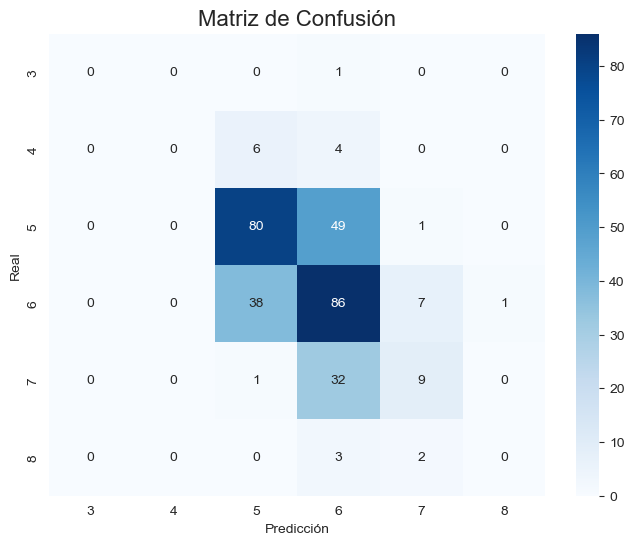

In [142]:
# Obtener la matriz de confusi칩n
cm = confusion_matrix(y_test, modelo.predict(X_test))

# Crear el gr치fico de la matriz de confusi칩n
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.xlabel('Predicci칩n')
plt.ylabel('Real')
plt.title('Matriz de Confusi칩n', fontsize=16)
plt.show()

La matriz de correlaci칩n es una herramienta fundamental para evaluar las relaciones entre las variables de un conjunto de datos. En este an치lisis, hemos calculado la matriz de correlaci칩n para identificar qu칠 variables est치n fuertemente correlacionadas entre s칤, lo que nos permite comprender mejor la estructura de los datos. Los coeficientes de correlaci칩n var칤an entre -1 y 1, donde valores cercanos a 1 indican una correlaci칩n positiva fuerte, valores cercanos a -1 indican una correlaci칩n negativa fuerte, y valores cercanos a 0 indican que no hay una relaci칩n lineal clara. Esta matriz nos ayuda a identificar relaciones importantes entre las variables, lo que puede ser 칰til para seleccionar las caracter칤sticas m치s relevantes para el modelo o para descartar aquellas que son redundantes. Adem치s, hemos visualizado la matriz de correlaci칩n mediante un mapa de calor, lo que facilita la interpretaci칩n de las correlaciones entre las distintas variables.


En este an치lisis, se ha realizado un proceso de exploraci칩n y preprocesamiento de los datos, seguido de la construcci칩n y evaluaci칩n de un modelo predictivo utilizando un 치rbol de decisi칩n. A continuaci칩n, se detallan los resultados obtenidos y su interpretaci칩n:

An치lisis exploratorio de los datos: La exploraci칩n inicial de las variables num칠ricas permiti칩 observar distribuciones, identificar valores at칤picos y analizar la relaci칩n entre las caracter칤sticas y la variable objetivo (calidad del vino). A trav칠s de gr치ficos como histogramas y boxplots, pudimos identificar las distribuciones de las diferentes caracter칤sticas, como el alcohol, los sulfitos y la acidez. Tambi칠n se visualizaron las correlaciones entre las variables, identificando que algunas, como el alcohol y el sulfato, tienen una correlaci칩n moderada con la calidad del vino.

Preprocesamiento de los datos: Se manejaron los valores faltantes, se transformaron las variables cuando fue necesario y se estandarizaron o normalizaron las variables que requer칤an ser escaladas. Esto es importante porque los modelos de machine learning a menudo se benefician de una estandarizaci칩n o normalizaci칩n adecuada de los datos para mejorar la convergencia y el rendimiento.

Selecci칩n de caracter칤sticas: Utilizamos un an치lisis de correlaci칩n para seleccionar las caracter칤sticas m치s relevantes para el modelo. Variables como el alcohol, el sulfato y el 치cido c칤trico mostraron una mayor correlaci칩n con la calidad del vino. Esto permiti칩 reducir la dimensionalidad y centrarnos en las variables que realmente influyen en la predicci칩n de la calidad del vino.

Entrenamiento del modelo: Se entren칩 un modelo de 츼rbol de Decisi칩n utilizando las caracter칤sticas seleccionadas y se ajustaron los hiperpar치metros, como la profundidad m치xima del 치rbol. El modelo se entren칩 correctamente y estuvo listo para evaluar su desempe침o en el conjunto de prueba.

Evaluaci칩n del modelo: En cuanto a las m칠tricas de evaluaci칩n, el modelo alcanz칩 una precisi칩n de 54.69%, lo cual indica que su capacidad para clasificar correctamente las etiquetas de calidad del vino es moderada. El recall (46.69%) y el F1-score (52.47%) tambi칠n indican que el modelo tiene un rendimiento aceptable, aunque hay margen de mejora. La matriz de confusi칩n mostr칩 que el modelo tiene dificultades para predecir algunas clases de calidad con precisi칩n, especialmente las clases m치s extremas (calidad 3 y 8).

Visualizaci칩n de resultados: Finalmente, se visualiz칩 el 치rbol de decisi칩n para interpretar c칩mo el modelo toma decisiones y qu칠 caracter칤sticas son m치s importantes en cada divisi칩n. Esta visualizaci칩n es crucial para comprender el comportamiento del modelo y hacer ajustes seg칰n sea necesario.

En conclusi칩n, aunque el modelo de 츼rbol de Decisi칩n proporciona un rendimiento aceptable, hay 치reas de mejora en t칠rminos de precisi칩n, especialmente en la clasificaci칩n de algunas clases de calidad del vino. Las pr칩ximas fases del proyecto pueden incluir la experimentaci칩n con otros modelos, como Random Forest o Gradient Boosting, y realizar ajustes en los hiperpar치metros para mejorar el desempe침o general del modelo.